In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [2]:
frequency_sampling, audio_signal = wavfile.read("ak_dalej_1.wav")

/home/doms/.conda/envs/dataexp/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')


Signal shape: (78107, 2)
Signal Datatype: float32
Signal duration: 1.77 seconds


Normalising signal: 

In [4]:
audio_signal = audio_signal / np.power(2, 15)

Visualising (only first 100 samples) 

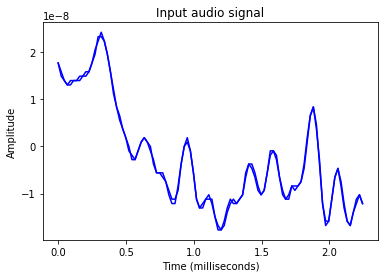

In [5]:
signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(frequency_sampling)
plt.plot(time_axis, signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [6]:
frequency_sampling, audio_signal = wavfile.read("ak_dalej_1.wav")
print(audio_signal.shape)

audio_signal = audio_signal[:15000]
#audio_signal

(78107, 2)


/home/doms/.conda/envs/dataexp/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Extract MFCC features:

In [7]:
features_mfcc = mfcc(audio_signal, frequency_sampling)
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 67
Length of each feature = 13


 Plot and visualize the MFCC features

Text(0.5,1.05,'MFCC')

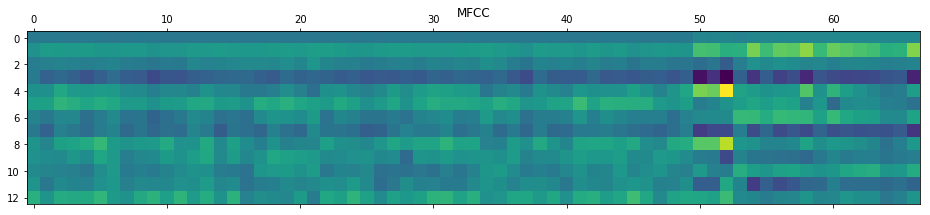

In [8]:
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

Extract the filter bank features

In [9]:
filterbank_features = logfbank(audio_signal, frequency_sampling)
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])


Filter bank:
Number of windows = 67
Length of each feature = 26


Visualise the filter bank features

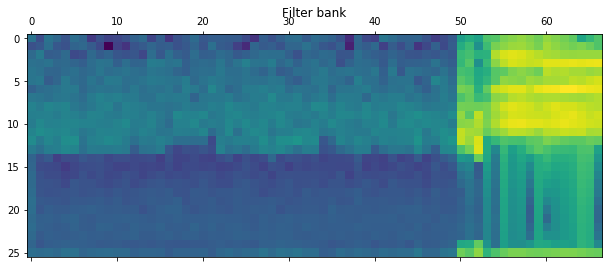

In [10]:
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()


In [11]:


d_path = "./data_list/"
d_files = sorted(os.listdir(d_path))
print(d_files)


['1.wav', '10.wav', '11.wav', '12.wav', '13.wav', '14.wav', '15.wav', '16.wav', '17.wav', '18.wav', '19.wav', '2.wav', '20.wav', '21.wav', '22.wav', '23.wav', '24.wav', '25.wav', '3.wav', '4.wav', '5.wav', '6.wav', '7.wav', '8.wav', '9.wav', 'ak-podglosnij-01.wav', 'ak-podglosnij-02.wav', 'ak-podglosnij-03.wav', 'ak-podglosnij-04.wav', 'ak-podglosnij-05.wav', 'ak-podglosnij-06.wav', 'ak-podglosnij-07.wav', 'ak-podglosnij-08.wav', 'ak-podglosnij-09.wav', 'ak-podglosnij-10.wav', 'ak-podglosnij-11.wav', 'ak-podglosnij-12.wav', 'ak-podglosnij-13.wav', 'ak-podglosnij-14.wav', 'ak-podglosnij-15.wav', 'ak-podglosnij-16.wav', 'ak-podglosnij-17.wav', 'ak-podglosnij-18.wav', 'ak-podglosnij-19.wav', 'ak-podglosnij-20.wav', 'ak-podglosnij-21.wav', 'ak-podglosnij-22.wav', 'ak-podglosnij-23.wav', 'ak-podglosnij-24.wav', 'ak-podglosnij-25.wav', 'ak-przycisz-01.wav', 'ak-przycisz-02.wav', 'ak-przycisz-03.wav', 'ak-przycisz-04.wav', 'ak-przycisz-05.wav', 'ak-przycisz-06.wav', 'ak-przycisz-07.wav', 'ak-

In [12]:
# import warnings
# warnings.filterwarnings('ignore')

flat_features_mfcc =  []
flat_features_bank = []

for file in d_files:
    frequency_sampling, audio_signal = wavfile.read(d_path+file)
    audio_signal = audio_signal[:15000]
    features_mfcc = mfcc(audio_signal, frequency_sampling)

    features_mfcc = features_mfcc.T
    flat_features_mfcc.append(features_mfcc.flatten()) # concat everyting to one vector
    filterbank_features = logfbank(audio_signal, frequency_sampling)
    flat_features_bank.append(filterbank_features.T.flatten())
 

/home/doms/.conda/envs/dataexp/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [13]:


# sort of risky solution
labels = pd.read_csv('list.csv', header=None).values.tolist()[0]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

scale = False

models_mfcc = ((SVC(gamma='auto'), "SVM"),
          (DecisionTreeClassifier(), "DecisionTree"),
           (RandomForestClassifier(), "RandomForest"),
           (ExtraTreesClassifier(), "ExtraTrees"),
           (AdaBoostClassifier(), "AdaBoost")
)

models_bank = ((SVC(gamma='auto'), "SVM"),
          (DecisionTreeClassifier(), "DecisionTree"),
           (RandomForestClassifier(), "RandomForest"),
           (ExtraTreesClassifier(), "ExtraTrees"),
           (AdaBoostClassifier(), "AdaBoost")
)


# save 0.2 dataset for testing, stratify so that train and test have similar % of each category
mfcc_train, mfcc_test, bank_train, bank_test, label_train, label_test =\
train_test_split(flat_features_mfcc, flat_features_bank, labels, test_size=0.2, stratify=labels)

if scale:
    scaler_mfcc = MinMaxScaler()
    scaler_bank = MinMaxScaler()

    scaler_mfcc.fit(mfcc_train)
    scaler_bank.fit(bank_train)
    scaler_mfcc.transform(mfcc_train)
    scaler_mfcc.transform(mfcc_test)

    scaler_bank.transform(bank_train)
    scaler_bank.transform(bank_test)


### Test on MFCC features ###

In [15]:
for model, name in models_mfcc:
    print(name)
    model.fit(mfcc_train, label_train)
    label_pred = model.predict(mfcc_test)
    print(classification_report(label_test, label_pred))
           

SVM


/home/doms/.conda/envs/dataexp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

     cofnij       0.00      0.00      0.00         6
      dalej       0.00      0.00      0.00        17
 podglosnij       0.25      1.00      0.40        16
   przycisz       0.00      0.00      0.00        11
     wstecz       0.00      0.00      0.00        15

avg / total       0.06      0.25      0.10        65

DecisionTree
             precision    recall  f1-score   support

     cofnij       0.44      0.67      0.53         6
      dalej       0.78      0.41      0.54        17
 podglosnij       0.48      0.75      0.59        16
   przycisz       0.33      0.27      0.30        11
     wstecz       0.54      0.47      0.50        15

avg / total       0.54      0.51      0.50        65

RandomForest
             precision    recall  f1-score   support

     cofnij       0.83      0.83      0.83         6
      dalej       0.67      0.59      0.62        17
 podglosnij       0.78      0.88      0.82        16
   przycisz  

### Test on filterbank features ###

In [ ]:
for model, name in models_bank:
    print(name)
    model.fit(bank_train, label_train)
    label_pred = model.predict(bank_test)
    print(classification_report(label_test, label_pred))

SVM


/home/doms/.conda/envs/dataexp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

     cofnij       0.00      0.00      0.00         6
      dalej       0.31      0.82      0.45        17
 podglosnij       0.56      0.56      0.56        16
   przycisz       0.50      0.09      0.15        11
     wstecz       0.50      0.07      0.12        15

avg / total       0.42      0.38      0.31        65

DecisionTree
             precision    recall  f1-score   support

     cofnij       0.57      0.67      0.62         6
      dalej       0.43      0.35      0.39        17
 podglosnij       0.40      0.62      0.49        16
   przycisz       0.25      0.18      0.21        11
     wstecz       0.64      0.47      0.54        15

avg / total       0.45      0.45      0.44        65

RandomForest
             precision    recall  f1-score   support

     cofnij       0.80      0.67      0.73         6
      dalej       0.80      0.71      0.75        17
 podglosnij       0.50      0.69      0.58        16
   przycisz  